In [302]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.feature_selection as fs
from sklearn.feature_selection import VarianceThreshold



In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
print(train.columns)
Y = train[['SalePrice']]
Y.sample(5)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,SalePrice
618,314813
128,155000
366,159000
704,213000
167,325624


In [5]:
column_mask = train.isna().sum() > 0
train.loc[:,column_mask].columns


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
my_columns = ['GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']
train[my_columns].head()

,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [7]:
train['GarageYrBlt'].isna().sum()
for i in my_columns:
    print('Column: {} has {} missing values.'.format(i,train[i].isna().sum()))
    

Column: GarageYrBlt has 81 missing values.
Column: GarageFinish has 81 missing values.
Column: GarageQual has 81 missing values.
Column: GarageCond has 81 missing values.
Column: PoolQC has 1453 missing values.
Column: Fence has 1179 missing values.
Column: MiscFeature has 1406 missing values.


In [8]:
column_mask = train[['GarageYrBlt','GarageFinish']].isna().any(axis=1)

In [11]:
train.loc[column_mask, my_columns].head()

,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,MnPrv,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When Garage is NaN, 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond' all can be set to 0.



In [14]:
#column_mask = train['PoolQC'].isna().any(axis=1)
#train.loc[column_mask,['PoolQC','PoolArea','MSSubClass']]
#train.loc[column_mask, ].head()

When PoolArea == 0, then can set PoolQC to 0

In [15]:
column_mask = train['Fence'].isna()
train.loc[column_mask, ['Fence', 'MSSubClass']].head()
train.Fence.value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

Fence can be set to 0 for NaNs since this indicates that there isn't a basement.

In [16]:
print(train.MiscFeature.value_counts(dropna=False))
column_mask = train['MiscFeature'].isna()
train.loc[column_mask,['MiscFeature','MSSubClass']].head()

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64


,MiscFeature,MSSubClass
0,NaN,60
1,NaN,20
2,NaN,60
3,NaN,70
4,NaN,60


MiscFeatures can be set to 0 since those are homes with no MiscFeature

In [17]:
train.Electrical.value_counts(dropna=False)
train.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [18]:
train.loc[train.Electrical.isna(), 'YearBuilt']

1379    2006
Name: YearBuilt, dtype: int64

In [19]:
train.loc[train.YearBuilt == 2006].groupby('Electrical').agg({'Electrical':'count'})

,Electrical
Electrical,
SBrkr,66


In [46]:
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values=np.nan, strategy='random')
#dir(imp)
import random

cat_list = set(train.loc[train.MasVnrType.notna(), 'MasVnrType'].values)
print(train.shape)
cat_list
#train_temp = train.MasVnrType.fillna(lambda x: random.choice(cat_list))
#column_mask = train.MasVnrType.isna()
#train_temp.loc[column_mask,'MasVnrType']
#cat_list = x in x in set(train.MasVnrType.values if x )
#train.loc[train.MasVnrArea.isna(),'MasVnrArea'].apply(lambda x: 

(1460, 81)


{'BrkCmn', 'BrkFace', 'None', 'Stone'}

In [47]:
random.seed(0)
train_temp = train.MasVnrType.fillna(lambda x: random.choice(cat_list))
train_temp.head()

0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object

In [73]:
train.iloc[948].BsmtExposure


nan

In [70]:
random.seed(0)
random.choice(train.loc[train.BsmtExposure.notna(), 'BsmtExposure'])


'No'

In [69]:
random.seed(0)
#random.choice(train.loc[train.BsmtFinSF2 > 0, 'BsmtFinType2'])

KeyError: 98

In [72]:
train.loc[train.Electrical.isna(), 'Electrical'] = 'SBrkr'

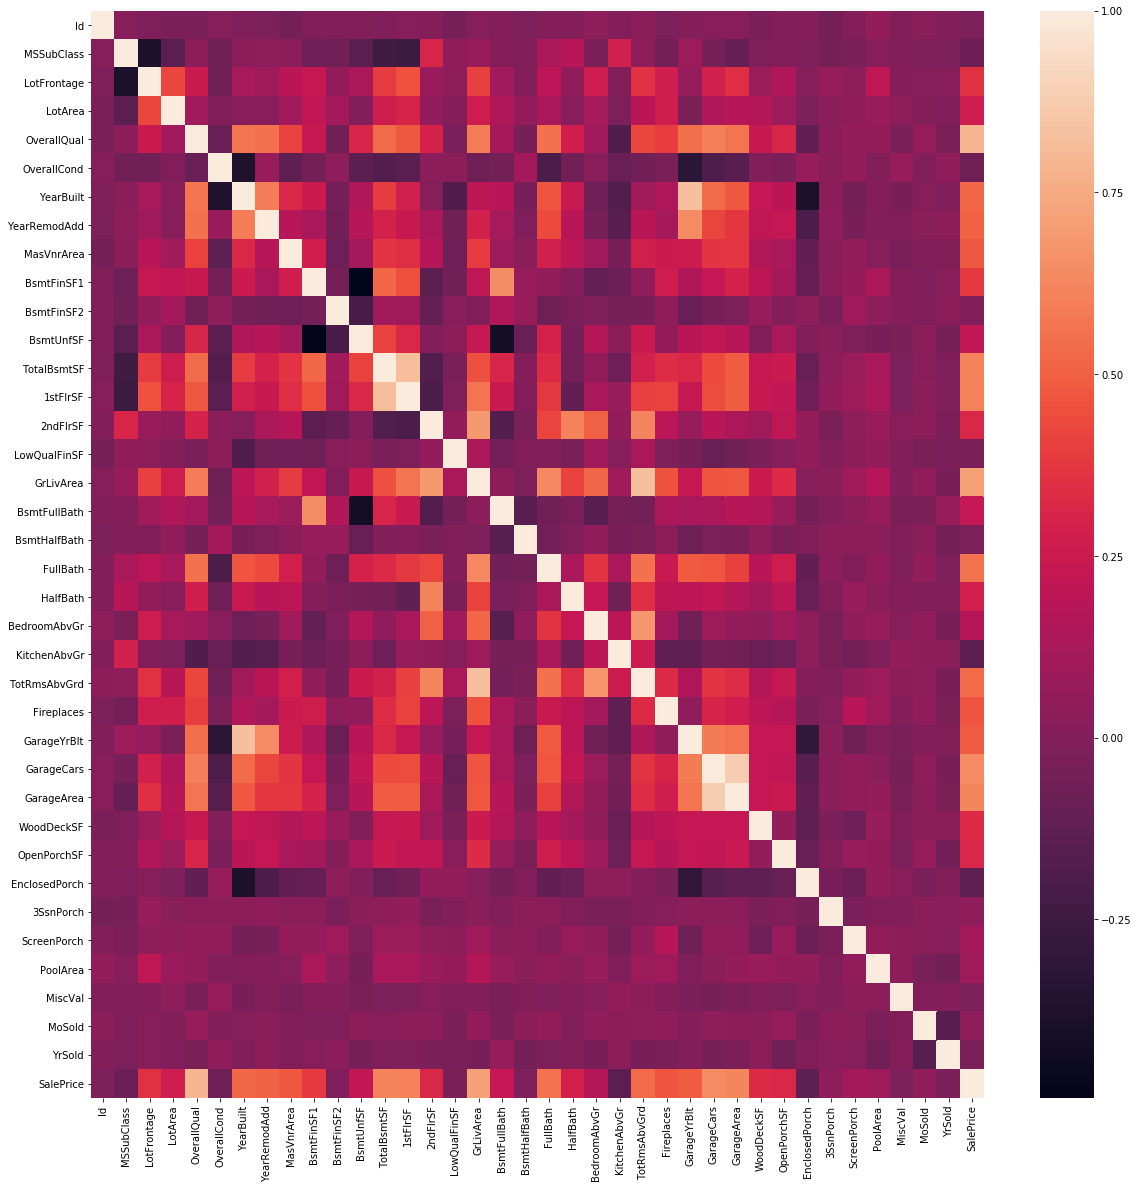

In [83]:
#plt.matshow(train.corr())
plt.figure(figsize=(20,20))
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

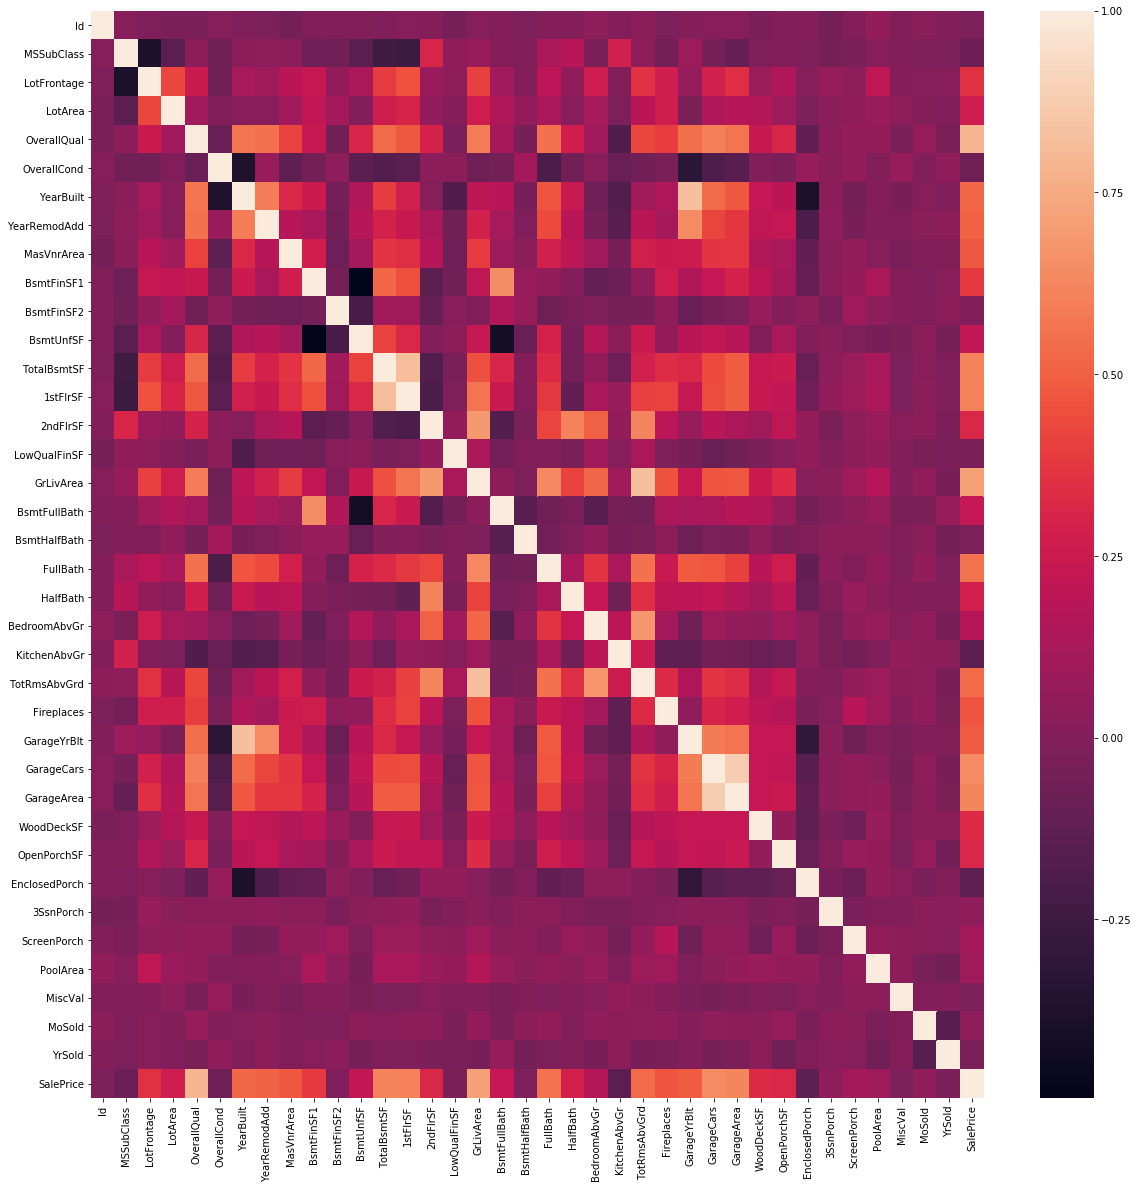

In [87]:
data = pd.read_csv('Kaggle_ML_Project/Modified_Data.csv', index_col=0)
data.head()
plt.figure(figsize=(20,20))
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [159]:
data_dummy = pd.get_dummies(data)
data.dtypes
#print(data_dummy.shape)
data.MasVnrType.value_counts()

#vt = VarianceThreshold(threshold=1)
#vt.fit_transform(data_dummy).shape

None                                         864
BrkFace                                      445
Stone                                        128
BrkCmn                                        15
<function <lambda> at 0x0000020E86C19A60>      8
Name: MasVnrType, dtype: int64

In [155]:
data.loc[:, data.dtypes == object].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [124]:
cur_features = list(corr.loc[abs(corr['SalePrice']) > 0.2, 'SalePrice'].index)
cur_features.remove('SalePrice')
cur_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [133]:
features = pd.get_dummies(data[cur_features])
features.head()
response = data.SalePrice
features.shape


(1460, 349)

In [160]:
temp = fs.f_regression(features, response)
print(features.columns)
#temp[1] > 0.05

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'MasVnrArea_921.0', 'MasVnrArea_922.0', 'MasVnrArea_94.0',
       'MasVnrArea_95.0', 'MasVnrArea_96.0', 'MasVnrArea_97.0',
       'MasVnrArea_975.0', 'MasVnrArea_98.0', 'MasVnrArea_99.0',
       'MasVnrArea_<function <lambda> at 0x0000020E86C19840>'],
      dtype='object', length=349)


In [362]:
#data = pd.read_csv('./Kaggle_ML_Project/Modified_Kaggle_Data.csv', index_col=0)
data = pd.read_csv('./Kaggle_ML_Project/Train_Kaggle_Data_11_11_5PM.csv', index_col=0, na_filter=False)
data.head()
corr = data.corr()
cur_features = list(corr.loc[abs(corr['SalePrice']) > 0.2, 'SalePrice'].index)
cur_features.remove('SalePrice')
print(len(cur_features))
#Continuous features

21


In [363]:
data.loc[:,data.dtypes == object ].columns


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [364]:
data.OverallCond.value_counts()


data.loc[:,'OverallCond'] = pd.Categorical(data.OverallCond, categories=range(1,11), ordered=True)
data.loc[:,'OverallQual'] = pd.Categorical(data.OverallQual, categories=range(1,11), ordered=True)

#condition = ['Ex', 'Gd', 'TA', 'Fa','Po', 'NA']
condition = ['NA','Po','Fa', 'TA', 'Gd', 'Ex']
data.loc[:, 'BsmtCond'] = pd.Categorical(data.BsmtCond, categories=condition, ordered=True) 
data.loc[:, 'BsmtQual'] = pd.Categorical(data.BsmtQual, categories=condition, ordered=True) 

#condition2 = ['Gd', 'Av', 'Mn', 'No', 'NA']
condition2 = ['NA', 'No', 'Mn', 'Av', 'Gd']
data.loc[:, 'BsmtExposure'] = pd.Categorical(data.BsmtExposure, categories=condition2, ordered=True)

#condition3 = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']
condition3 = ['Na', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
data.loc[:, 'BsmtFinType1'] = pd.Categorical(data.BsmtFinType1, categories=condition3, ordered=True)
data.loc[:, 'BsmtFinType2'] = pd.Categorical(data.BsmtFinType2, categories=condition3, ordered=True)

#condition4 = ['Ex', 'Gd', 'TA', 'Fa','Po']
condition4 = ['Po', 'Fa', 'TA', 'Gd','Ex']
data.loc[:, 'HeatingQC'] = pd.Categorical(data.HeatingQC, categories=condition4, ordered=True)
data.loc[:, 'KitchenQual'] = pd.Categorical(data.KitchenQual, categories=condition4, ordered=True)

#condition5 = ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal']
condition5 = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
data.loc[:, 'Functional'] = pd.Categorical(data.Functional, categories=condition5, ordered=True)
data.loc[:, 'FireplaceQu'] = pd.Categorical(train.FireplaceQu, categories=condition, ordered=True)

condition6 = ['NA', 'Unf', 'RFn', 'Fin']
data.loc[:, 'GarageFinish'] = pd.Categorical(train.GarageFinish, categories=condition6, ordered=True)
data.loc[:, 'GarageQual'] = pd.Categorical(train.GarageQual, categories=condition, ordered=True)
data.loc[:, 'GarageCond'] = pd.Categorical(train.GarageCond, categories=condition, ordered=True)

condition7 = ['N', 'P', 'Y']
data.loc[:, 'PavedDrive'] = pd.Categorical(train.PavedDrive, categories=condition7, ordered=True)

condition8 = ['NA', 'Fa', 'TA', 'Gd', 'Ex']
data.loc[:, 'PoolQC'] = pd.Categorical(train.PoolQC, categories=condition8, ordered=True)
data.loc[:, 'MSSubClass'] = pd.Categorical(train.MSSubClass)

#data.head()


In [365]:
test_data = pd.read_csv('./test.csv')
test_data.shape
#test_data.isna().sum()

(1459, 80)

In [366]:
temp = data.dtypes.to_dict()
#temp = temp.to_dict()
#print(temp)
cat_list = []
ord_list = []
cont_list = []
for key,value in temp.items():
    if(str(value) not in ['float64', 'int64']):
        if(str(value) == 'category'):
            ord_list.append(key)
        elif (str(value) == 'object'):
            cat_list.append(key)
        else:
            print('Key {} is type {}'.format(key, value))
    else:
        cont_list.append(key)

print(len(ord_list))
print('Ordinal Features:\n'+"\n".join(ord_list))

17
Ordinal Features:
MSSubClass
OverallQual
OverallCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
HeatingQC
KitchenQual
Functional
FireplaceQu
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC


In [367]:
print(len(cat_list))
print('Categorical Features:\n'+"\n".join(cat_list))

30
Categorical Features:
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
Heating
CentralAir
Electrical
GarageType
GarageYrBlt
Fence
MiscFeature
SaleType
SaleCondition


In [368]:
print(len(cont_list))
print('Continuous Features:\n'+'\n'.join(cont_list))

34
Continuous Features:
Id
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [369]:
data[cont_list].dtypes

Id                 int64
LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [370]:
cont_list.remove('SalePrice')
data[cont_list].head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008


In [374]:
f_score, p_value = fs.f_regression(data[cont_list], data.SalePrice)
#[x for x in p_value if filter(p_value < 0.04)]
print(["Feature {} is significant: pvalue is {}".format(cont_list[i],x) for i,x in enumerate(p_value) if x < 0.05 ])
sig_cont_list = [cont_list[i] for i,x in enumerate(p_value) if x < 0.05]
len(sig_cont_list)
#enumerate(p_value)

['Feature LotFrontage is significant: pvalue is 5.824303154720344e-16\n', 'Feature LotArea is significant: pvalue is 1.123139154918582e-24\n', 'Feature YearBuilt is significant: pvalue is 2.9902290990165e-103\n', 'Feature YearRemodAdd is significant: pvalue is 3.1649482424284953e-96\n', 'Feature MasVnrArea is significant: pvalue is 4.100461044536029e-82\n', 'Feature BsmtFinSF1 is significant: pvalue is 3.3941098292886874e-53\n', 'Feature BsmtUnfSF is significant: pvalue is 1.1829757963594766e-16\n', 'Feature TotalBsmtSF is significant: pvalue is 9.484229391498227e-152\n', 'Feature 1stFlrSF is significant: pvalue is 5.394710618965467e-147\n', 'Feature 2ndFlrSF is significant: pvalue is 5.7643351191794677e-36\n', 'Feature GrLivArea is significant: pvalue is 4.5180336467707076e-223\n', 'Feature BsmtFullBath is significant: pvalue is 1.5503441372133818e-18\n', 'Feature FullBath is significant: pvalue is 1.2364700667581232e-121\n', 'Feature HalfBath is significant: pvalue is 1.6504733955713

25